# Classification Models with Keras

## Objective for this Notebook    
 - Use of MNIST database for training various image processing systems
 - Build a Neural Network
 - Train and Test the Network. 


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item312">Import Keras and Packages</a>      
2. <a href="#item322">Build a Neural Network</a>     
3. <a href="#item332">Train and Test the Network</a>     

</font>
</div>


<a id='item312'></a>


## Import Keras and Packages


Let's start by importing Keras and some of its modules.


In [49]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
!pip install numpy==1.26.0
!pip install pandas==2.2.2
!pip install tensorflow_cpu==2.18.0
!pip install scikit-learn
!pip install matplotlib

In [50]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical

import os
# Disable oneDNN optimizations if you don't want the floating-point precision warning
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings
warnings.simplefilter('ignore', FutureWarning)
import matplotlib.pyplot as plt

The Keras library conveniently includes the MNIST dataset as part of its API. You can check other datasets within the Keras library [here](https://keras.io/datasets/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01). The MNIST dataset is a large database of handwritten digits that is commonly used for training various image processing systems. 
So, let's load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set. 

In [51]:
# import the data
from keras.datasets import mnist

# read the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# here Predicted values cöomes from x_train and  target values comes from y_train

**Comment**:
- x_train → training images (input data)
- y_train → training labels (target / ground truth T)
- Later the Predicted values for a specific x_train will come from the model 

Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.


In [52]:
x_train.shape

(60000, 28, 28)

**comment**: 
- The first number in the output tuple is the number of images in the training data
- The other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.


Let's visualize the first image in the training set using Matplotlib's scripting layer.


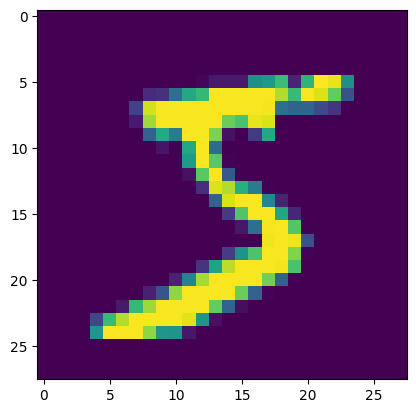

In [53]:
plt.imshow(x_train[0])

We are not using conventional neural networks (CNN), So we need to flatten the images into one-dimensional vectors like the following:

<img src="assets/images/symbol_cat_cnn.png" alt="symbol_cat_cnn" width="400"/>

In our example each letter of size 1 x (28 x 28) = 1 x 784.

<img src="assets/images/symbol_cnn.png" alt="symbol_cnn" width="400"/>

In [54]:
# flatten images into one-dimensional vector

num_pixels = x_train.shape[1] * x_train.shape[2] # find size of one-dimensional vector

x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32') # flatten training images
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32') # flatten test images

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1. THis step helps the model learn better and faster.


In [55]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.


In [56]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(f"The number of classes are: {num_classes}")
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

The number of classes are: 10
y_train shape: (60000, 10)
y_test shape: (10000, 10)


**Comment**: The number of classes is 10 because the MNIST dataset contains digits 0 through 9, which are 10 distinct categories.

<a id='item322'></a>


## Build a Neural Network
Let's define a function that defines our classification model for us so that we can conveniently call it to create our model.

In [57]:
# define classification model
def classification_model():
    # create model
    model = Sequential([
    Input(shape=(num_pixels,)),      # input layer
    Dense(100, activation='relu'),   # hidden layer
    Dense(num_classes, activation='softmax')  # output layer
    ])
    # Print a summary
    model.summary()
    
    # compile model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', # The loss function used for multi-class classification problems
                  metrics=['accuracy'])
    return model

<a id='item332'></a>


## Train and Test the Network


In [64]:
# build the model
model = classification_model()

# fit the model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=20, verbose=2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 - 2s - 937us/step - accuracy: 0.9238 - loss: 0.2708 - val_accuracy: 0.9569 - val_loss: 0.1406
Epoch 2/20
1875/1875 - 1s - 752us/step - accuracy: 0.9646 - loss: 0.1218 - val_accuracy: 0.9649 - val_loss: 0.1077
Epoch 3/20
1875/1875 - 1s - 778us/step - accuracy: 0.9746 - loss: 0.0847 - val_accuracy: 0.9733 - val_loss: 0.0842
Epoch 4/20
1875/1875 - 1s - 737us/step - accuracy: 0.9814 - loss: 0.0619 - val_accuracy: 0.9744 - val_loss: 0.0848
Epoch 5/20
1875/1875 - 1s - 760us/step - accuracy: 0.9847 - loss: 0.0485 - val_accuracy: 0.9752 - val_loss: 0.0789
Epoch 6/20
1875/1875 - 1s - 786us/step - accuracy: 0.9881 - loss: 0.0389 - val_accuracy: 0.9766 - val_loss: 0.0778
Epoch 7/20
1875/1875 - 1s - 769us/step - accuracy: 0.9902 - loss: 0.0311 - val_accuracy: 0.9773 - val_loss: 0.0777
Epoch 8/20
1875/1875 - 1s - 760us/step - accuracy: 0.9916 - loss: 0.0266 - val_accuracy: 0.9759 - val_loss: 0.0794
Epoch 9/20
1875/1875 - 1s - 750us/step - accuracy: 0.9930 - loss: 0.0216 - val_a

In [60]:

# evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print(f"Train Loss: {scores[0]:.4f},\n Train Accuracy: {scores[1]:.4f} %")
print(f' Error (1- Train Accuracy ): {1 - scores[1]:.4f}')  

Train Loss: 0.2432,
 Train Accuracy: 0.9786 %
 Error (1- Train Accuracy ): 0.0214


**Comment**:
- A loss function of 0.0923 indicates the model is doing very well on the training set.
- 97.99% Accuracy means that almost 98 out of 100 training samples are classified correctly.
- 0.0201 ≈ 2%, meaning 2 out of 100 samples are predicted incorrectly.

##  Plot the Loss function
We plot the folllowing quantities over the epochs history
- Training Loss is the error measured on the training dataset during training. Reflects how well the model fits the data it has seen.
- Validation Loss is the error measured on a separate validation set not used for training. Reflects generalization to unseen data.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


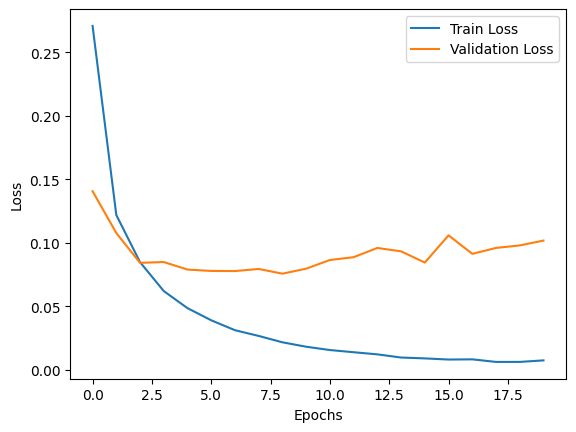

In [65]:
import matplotlib.pyplot as plt
# Plot Loss
print(history.history.keys())
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Comment**: The data shuld reveals one of the following options
- Good sign: both losses decrease and stabilize.
- Overfitting: training loss ↓, validation loss ↑
- Underfitting: both losses remain high

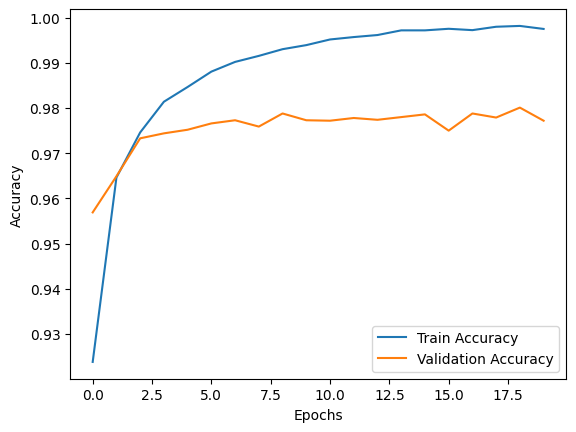

In [66]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
# predictions will contain model outputs for each sample in x_train
predictions = model.predict(x_train)
print(predictions[0])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step
[0.0000000e+00 0.0000000e+00 8.1701440e-23 7.7155768e-08 0.0000000e+00
 9.9999988e-01 0.0000000e+00 2.3915667e-37 3.7448113e-27 2.9604240e-27]


**Comment**:The highest value in each row is the predicted class.

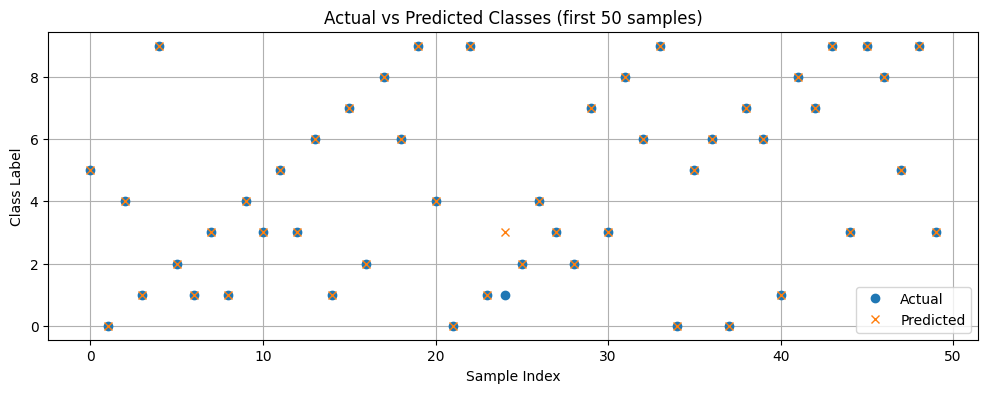

In [63]:
# Plot Predictions
# Convert one-hot to class labels
target_classes = y_train.argmax(axis=1)
predicted_classes = predictions.argmax(axis=1)
                                      

plt.figure(figsize=(12,4))
plt.plot(target_classes[:50], 'o', label='Actual')
plt.plot(predicted_classes[:50], 'x', label='Predicted')
plt.title('Actual vs Predicted Classes (first 50 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.legend()
plt.grid(True)
plt.show()